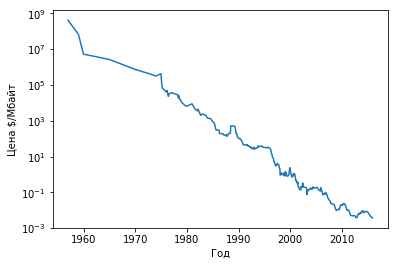

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
ram_prices = pd.read_csv("ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Год")
plt.ylabel("Цена $/Мбайт")
plt.show()

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# используем исторические данные для прогнозирования цен после 2000 года
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# прогнозируем цены по датам
X_train = data_train.date[:, np.newaxis]
# мы используем логпреобразование, что получить простую взаимосвязь между данными и откликом
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# прогнозируем по всем данным
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# экспоненцируем, чтобы обратить логарифмическое преобразование
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

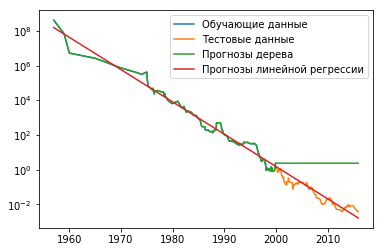

In [7]:
plt.semilogy(data_train.date, data_train.price, label="Обучающие данные")
plt.semilogy(data_test.date, data_test.price, label="Тестовые данные")
plt.semilogy(ram_prices.date, price_tree, label="Прогнозы дерева")
plt.semilogy(ram_prices.date, price_lr, label="Прогнозы линейной регрессии")
plt.legend()
plt.show()